In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("final_metric_stats.csv")
df.head()

,area_name,n_unmarried_males_20_24,n_unmarried_males_25_29,n_unmarried_males_30_34,n_married_males_20_24,n_married_males_25_29,n_married_males_30_34,n_unmarried_females_20_24,n_unmarried_females_25_29,n_unmarried_females_30_34,...,p_unmarried_25_29_female,p_unmarried_30_34_female,n_extra_unmarried_20_24_females,m_f_income_gap,m_f_income_ratio,p_gay,m_f_obesity_diff,p_hapa,p_white,p_black
0,"Aberdeen, SD Micro Area",1520.0,904.0,391.0,53.0,536.0,739.0,1148.0,612.0,367.0,...,0.403694,0.484169,-372.0,10836.0,1.384952,0.053181,1.5,0.000257,0.901060,0.021717
1,"Aberdeen, WA Micro Area",1952.0,1656.0,1133.0,36.0,505.0,761.0,1301.0,990.0,588.0,...,0.374150,0.341662,-651.0,4354.0,1.198360,0.002947,-1.3,0.005345,0.876654,0.011803
2,"Abilene, TX Metro Area",7241.0,3986.0,2673.0,1010.0,2434.0,2444.0,5633.0,2715.0,1260.0,...,0.405163,0.320366,-1608.0,4523.0,1.191417,0.016076,-1.1,0.004969,0.773655,0.081802
3,"Ada, OK Micro Area",1368.0,847.0,455.0,122.0,509.0,639.0,1331.0,606.0,295.0,...,0.417068,0.393333,-37.0,4639.0,1.207738,0.012937,0.7,0.004484,0.687368,0.025342
4,"Adrian, MI Micro Area",3007.0,2219.0,1456.0,235.0,715.0,1175.0,2638.0,1465.0,805.0,...,0.397666,0.356037,-369.0,9512.0,1.374032,0.006137,-0.9,0.003985,0.930830,0.025117


# Metric importance

1. p_unmarried_20_24_female (positive)
2. median_income_males_living_alone
2. m_f_income_ratio (negative - want lower male income and higher female income)
3. female obesity (negative - want low female obesity)
3. m_f obesity diff (positive - want higher male obesity and lower female obesity)
4. median rent (negative)
5. p_black (negative)

In [3]:
for col in df.columns:
    print(col)

area_name
n_unmarried_males_20_24
n_unmarried_males_25_29
n_unmarried_males_30_34
n_married_males_20_24
n_married_males_25_29
n_married_males_30_34
n_unmarried_females_20_24
n_unmarried_females_25_29
n_unmarried_females_30_34
n_married_females_20_24
n_married_females_25_29
n_married_females_30_34
n_males_middle_school_dropout
n_males_high_school_dropout
n_males_ged
n_males_college_dropout
n_males_associates
n_males_bachelors
n_males_grad
n_females_middle_school_dropout
n_females_high_school_dropout
n_females_ged
n_females_college_dropout
n_females_associates
n_females_bachelors
n_females_grad
n_households
n_white_households
n_black_households
n_amerindian_households
n_asian_households
n_islander_households
n_mixed_households
n_hispanic_households
median_income_males_living_alone
median_income_females_living_alone
p_male_disabled
p_female_disabled
p_white_disabled
p_black_disabled
p_amerindian_disabled
p_asian_disabled
p_hawaiian_disabled
p_nonhisp_white_disabled
p_hispanic_disabled
p_d

In [4]:
from tqdm import tqdm

def efficient_frontier_finder(df, metric_dict):
    """
    a point X is on the efficient frontier if DNE point Y st
    (metric(X) <= metric(Y) for all metrics)
    i'm kind of extending the defn of "efficient frontier" in markowitz portfolio analysis
    """
    metric_items = metric_dict.items()
    metric_cols, metric_signs = list(zip(*metric_dict.items()))
    metric_cols = np.array(metric_cols)
    metric_signs = np.array(metric_signs, dtype=int)
    assert len(metric_cols) == len(metric_signs)
    efficient_inds = []
    for i, rowi in tqdm(df.iterrows()):
        if not rowi[metric_cols].isnull().any():
            # find Y that is at least as good on all metrics
            metric_diffs = (df[metric_cols] - rowi[metric_cols]) * metric_signs
            y_not_worse = (metric_diffs >= 0).all(axis=1)
            if y_not_worse.sum() == 1: # will always match w itself
                efficient_inds.append(i)
    return df.loc[efficient_inds]
            
efficient_points = efficient_frontier_finder(df, {"p_unmarried_20_24_female": 1, "n_people":1})
efficient_points

1005it [00:01, 615.94it/s]


,area_name,n_unmarried_males_20_24,n_unmarried_males_25_29,n_unmarried_males_30_34,n_married_males_20_24,n_married_males_25_29,n_married_males_30_34,n_unmarried_females_20_24,n_unmarried_females_25_29,n_unmarried_females_30_34,...,p_unmarried_25_29_female,p_unmarried_30_34_female,n_extra_unmarried_20_24_females,m_f_income_gap,m_f_income_ratio,p_gay,m_f_obesity_diff,p_hapa,p_white,p_black
96,"Bloomsburg-Berwick, PA Metro Area",3468.0,1672.0,1123.0,137.0,663.0,1069.0,4094.0,1250.0,789.0,...,0.427789,0.412657,626.0,8494.0,1.393186,0.021338,0.1,0.001584,0.948627,0.017922
104,"Boston-Cambridge-Newton, MA-NH Metro Area",166502.0,152604.0,87730.0,2873.0,27701.0,74246.0,163707.0,135732.0,72770.0,...,0.470742,0.453396,-2795.0,12829.0,1.358833,0.036654,1.0,0.008015,0.760209,0.083332
159,"Charlottesville, VA Metro Area",7792.0,5125.0,3291.0,324.0,1900.0,3216.0,8168.0,5295.0,2699.0,...,0.508157,0.450584,376.0,-58.0,0.998586,0.022727,-1.3,0.007705,0.797842,0.119980
245,"Durham-Chapel Hill, NC Metro Area",22085.0,17173.0,10497.0,767.0,4837.0,9268.0,22823.0,16428.0,9489.0,...,0.488914,0.474782,738.0,4604.0,1.138524,0.031042,-4.8,0.006488,0.624929,0.265609
293,"Florence, SC Metro Area",5776.0,4360.0,2769.0,283.0,1662.0,2493.0,6065.0,4799.0,2936.0,...,0.523965,0.514636,289.0,5275.0,1.250832,0.008521,-2.1,0.002599,0.546073,0.422088
347,"Greenville, NC Metro Area",10306.0,4693.0,2154.0,259.0,1581.0,2552.0,11937.0,4680.0,2214.0,...,0.499307,0.506868,1631.0,2147.0,1.087248,0.012322,-2.3,0.006294,0.572131,0.347043
521,"Marion, IN Micro Area",2280.0,1321.0,704.0,144.0,471.0,488.0,2928.0,1060.0,661.0,...,0.445191,0.484249,648.0,9092.0,1.413592,0.026164,-0.4,0.001821,0.878228,0.072398
607,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",585877.0,582929.0,366543.0,14529.0,101879.0,262950.0,568225.0,525463.0,312391.0,...,0.474077,0.460120,-17652.0,13833.0,1.409588,0.044307,-1.0,0.006840,0.575429,0.173251
633,"Orlando-Kissimmee-Sanford, FL Metro Area",80501.0,75360.0,45049.0,3559.0,19351.0,36193.0,79613.0,62263.0,36424.0,...,0.452417,0.447068,-888.0,8327.0,1.291184,0.041526,-0.8,0.005527,0.697271,0.165791
667,"Pierre, SD Micro Area",382.0,543.0,196.0,0.0,117.0,392.0,597.0,395.0,307.0,...,0.421109,0.610338,215.0,6027.0,1.185795,0.000000,0.1,0.000873,0.851055,0.001164


In [5]:
# trim_df = df.query("n_people > 150000")
trim_df = df.query("n_people > 200000")

metric_dict = {
    "p_unmarried_20_24_female": 1, # more unmarried women per unmarried men
    "median_income_males_living_alone": -1,
    #"median_income_females_living_alone": 1,
    #"m_f_income_ratio": -1,
    #"percent_obese_male": 1,
    "percent_obese_fem": -1,
    #"p_gay": 1,
    #"m_f_obesity_diff": 1,
    #"p_black": -1
}

extra_cols = [
    "p_unmarried_20_24_female", 
    "median_income_males_living_alone",
    "median_income_females_living_alone",
    "percent_obese_male",
    "percent_obese_fem",
    "p_black",
    "median_rent_1_bed",
    "p_gay",
    "n_people"
             ]

eff_df = efficient_frontier_finder(trim_df, metric_dict)
print(eff_df.shape)
eff_df.sort_values("p_unmarried_20_24_female", ascending=False)[["area_name", *extra_cols]]

226it [00:00, 620.24it/s]

(27, 117)


,area_name,p_unmarried_20_24_female,median_income_males_living_alone,median_income_females_living_alone,percent_obese_male,percent_obese_fem,p_black,median_rent_1_bed,p_gay,n_people
293,"Florence, SC Metro Area",0.512203,26305.0,21030.0,31.4,33.5,0.422088,524.0,0.008521,205502.0
159,"Charlottesville, VA Metro Area",0.511779,40966.0,41024.0,20.6,21.9,0.119980,981.0,0.022727,215445.0
836,"Tallahassee, FL Metro Area",0.510587,31061.0,29631.0,24.9,27.2,0.327292,838.0,0.023835,382197.0
717,"Roanoke, VA Metro Area",0.508855,32366.0,27457.0,27.0,26.6,0.131798,649.0,0.023942,313009.0
423,"Johnson City, TN Metro Area",0.496923,26287.0,21197.0,29.4,31.9,0.031512,569.0,0.014116,202049.0
104,"Boston-Cambridge-Newton, MA-NH Metro Area",0.495768,48581.0,35752.0,22.1,21.1,0.083332,1225.0,0.036654,4832346.0
128,"Burlington-South Burlington, VT Metro Area",0.494433,38003.0,34572.0,21.8,21.6,0.021775,970.0,0.011717,218784.0
607,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",0.492352,47606.0,33773.0,18.3,19.3,0.173251,1319.0,0.044307,19294236.0
216,"Daphne-Fairhope-Foley, AL Metro Area",0.490328,34180.0,27680.0,29.4,26.2,0.092647,784.0,0.019168,212830.0
812,"Springfield, MO Metro Area",0.490110,28349.0,24181.0,29.0,31.2,0.023709,573.0,0.021499,462434.0


In [6]:
def evaluate_area(area_name, metric_cols):
    vals = df.loc[df["area_name"] == area_name, metric_cols].iloc[0]
    #vals = df.query("area_name == '%s'".format(area_name))[metric_cols]
    for metric_col, val in zip(metric_cols, vals):
        p = (trim_df[metric_col] < val).mean()
        print("%s == %.3f \t\t higher than %.3f of big metro areas"%(metric_col, val, p))
foo = metric_dict.keys()
for area_name in [
    "Portland-Vancouver-Hillsboro, OR-WA Metro Area",
    "New York-Newark-Jersey City, NY-NJ-PA Metro Area",
    "Seattle-Tacoma-Bellevue, WA Metro Area",
    "San Francisco-Oakland-Berkeley, CA Metro Area",
    "San Jose-Sunnyvale-Santa Clara, CA Metro Area",
    "Charlottesville, VA Metro Area",
    "Tallahassee, FL Metro Area",
    
]:
    print(area_name, "----------------------")
    evaluate_area(area_name, foo)

Portland-Vancouver-Hillsboro, OR-WA Metro Area ----------------------
p_unmarried_20_24_female == 0.482 		 higher than 0.619 of big metro areas
median_income_males_living_alone == 42792.000 		 higher than 0.814 of big metro areas
percent_obese_fem == 26.900 		 higher than 0.186 of big metro areas
New York-Newark-Jersey City, NY-NJ-PA Metro Area ----------------------
p_unmarried_20_24_female == 0.492 		 higher than 0.863 of big metro areas
median_income_males_living_alone == 47606.000 		 higher than 0.938 of big metro areas
percent_obese_fem == 19.300 		 higher than 0.004 of big metro areas
Seattle-Tacoma-Bellevue, WA Metro Area ----------------------
p_unmarried_20_24_female == 0.460 		 higher than 0.217 of big metro areas
median_income_males_living_alone == 53164.000 		 higher than 0.978 of big metro areas
percent_obese_fem == 22.700 		 higher than 0.049 of big metro areas
San Francisco-Oakland-Berkeley, CA Metro Area ----------------------
p_unmarried_20_24_female == 0.487 		 higher

In [7]:
trim_df["p_unmarried_20_24_female"].describe()

count    226.000000
mean       0.470633
std        0.026043
min        0.346217
25%        0.462090
50%        0.476158
75%        0.486687
max        0.512203
Name: p_unmarried_20_24_female, dtype: float64

In [8]:
trim_df["p_black"].describe()

count    226.000000
mean       0.118840
std        0.106464
min        0.004442
25%        0.040679
50%        0.084225
75%        0.165508
max        0.504153
Name: p_black, dtype: float64

<AxesSubplot:xlabel='p_unmarried_20_24_female', ylabel='p_black'>

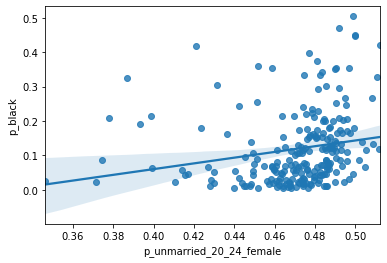

In [9]:
sns.regplot(x="p_unmarried_20_24_female", y="p_black", data=trim_df)

In [10]:
trim_df[extra_cols].median()

p_unmarried_20_24_female                   0.476158
median_income_males_living_alone       35593.000000
median_income_females_living_alone     27888.500000
percent_obese_male                        30.200000
percent_obese_fem                         31.000000
p_black                                    0.084225
median_rent_1_bed                        746.000000
p_gay                                      0.023451
n_people                              480129.000000
dtype: float64

In [11]:
trim_df.sort_values("p_white", ascending=False).iloc[0:30]

,area_name,n_unmarried_males_20_24,n_unmarried_males_25_29,n_unmarried_males_30_34,n_married_males_20_24,n_married_males_25_29,n_married_males_30_34,n_unmarried_females_20_24,n_unmarried_females_25_29,n_unmarried_females_30_34,...,p_unmarried_25_29_female,p_unmarried_30_34_female,n_extra_unmarried_20_24_females,m_f_income_gap,m_f_income_ratio,p_gay,m_f_obesity_diff,p_hapa,p_white,p_black
466,"Laredo, TX Metro Area",9871.0,5833.0,3607.0,626.0,2935.0,3979.0,8981.0,4390.0,3069.0,...,0.429424,0.459706,-890.0,15607.0,1.932095,0.011122,0.5,0.000344,0.958753,0.004442
444,"Kingsport-Bristol, TN-VA Metro Area",7260.0,4929.0,2673.0,924.0,3262.0,4192.0,5798.0,3757.0,1920.0,...,0.432535,0.418027,-1462.0,5136.0,1.235607,NaN,1.7,0.001876,0.950145,0.018447
391,"Huntington-Ashland, WV-KY-OH Metro Area",10841.0,6899.0,4252.0,871.0,3199.0,4562.0,9677.0,5212.0,2850.0,...,0.430353,0.401295,-1164.0,5367.0,1.264776,0.018528,-0.2,0.002120,0.947506,0.023699
476,"Lebanon, NH-VT Micro Area",6801.0,4949.0,3051.0,296.0,1102.0,2802.0,5951.0,4191.0,2331.0,...,0.458534,0.433110,-850.0,3276.0,1.112570,NaN,-4.1,0.005736,0.945016,0.009315
120,"Brownsville-Harlingen, TX Metro Area",13480.0,8043.0,4135.0,1989.0,4319.0,6521.0,11688.0,6231.0,3987.0,...,0.436528,0.490889,-1792.0,5157.0,1.314566,0.014742,0.0,0.000799,0.943206,0.005789
685,"Portland-South Portland, ME Metro Area",14829.0,12594.0,6808.0,566.0,3201.0,8438.0,13774.0,10635.0,5603.0,...,0.457833,0.451454,-1055.0,5531.0,1.176416,0.025109,-0.2,0.006012,0.934521,0.020522
423,"Johnson City, TN Metro Area",6704.0,4344.0,2253.0,612.0,1999.0,2889.0,6622.0,2826.0,1604.0,...,0.394142,0.415867,-82.0,5090.0,1.240128,0.014116,-2.5,0.001821,0.930482,0.031512
240,"Duluth, MN-WI Metro Area",11185.0,6047.0,3962.0,499.0,2451.0,3899.0,10084.0,4452.0,2593.0,...,0.424040,0.395576,-1101.0,7491.0,1.294400,0.009232,1.0,0.003616,0.920411,0.015561
812,"Springfield, MO Metro Area",17117.0,8351.0,4607.0,2442.0,6490.0,8838.0,16453.0,6132.0,3560.0,...,0.423393,0.435901,-664.0,4168.0,1.172367,0.021499,-2.2,0.003957,0.919653,0.023709
696,"Provo-Orem, UT Metro Area",28947.0,9406.0,4011.0,9087.0,14439.0,13834.0,22731.0,6373.0,2423.0,...,0.403891,0.376593,-6216.0,8325.0,1.275325,0.030296,0.1,0.009256,0.916886,0.005715


In [12]:
pr_df = df.query("(n_people > 100000)")
pr_df = pr_df.loc[pr_df["area_name"].str.contains(", PR")]
pr_df
# efficient_frontier_finder(pr_df, metric_cols, metric_signs).sort_values("p_unmarried_20_24_female", ascending=False)

,area_name,n_unmarried_males_20_24,n_unmarried_males_25_29,n_unmarried_males_30_34,n_married_males_20_24,n_married_males_25_29,n_married_males_30_34,n_unmarried_females_20_24,n_unmarried_females_25_29,n_unmarried_females_30_34,...,p_unmarried_25_29_female,p_unmarried_30_34_female,n_extra_unmarried_20_24_females,m_f_income_gap,m_f_income_ratio,p_gay,m_f_obesity_diff,p_hapa,p_white,p_black
5,"Aguadilla-Isabela, PR Metro Area",9685.0,7641.0,4949.0,182.0,1269.0,2411.0,8915.0,5658.0,3896.0,...,0.425446,0.440475,-770.0,1472.0,1.174139,0.011670,NaN,0.000399,0.742384,0.027113
36,"Arecibo, PR Metro Area",5934.0,4376.0,2906.0,228.0,1363.0,1241.0,5094.0,4031.0,1984.0,...,0.479481,0.405726,-840.0,1649.0,1.184473,0.013145,NaN,0.000000,0.850177,0.031944
680,"Ponce, PR Metro Area",8239.0,6567.0,4216.0,244.0,956.0,1352.0,7328.0,5662.0,3897.0,...,0.462998,0.480340,-911.0,1035.0,1.106855,0.002572,NaN,0.000000,0.685030,0.057798
757,"San Germán, PR Metro Area",4436.0,2700.0,2165.0,136.0,390.0,708.0,3856.0,2722.0,2074.0,...,0.502029,0.489266,-580.0,519.0,1.053627,0.006975,NaN,0.001005,0.403626,0.015344
759,"San Juan-Bayamón-Caguas, PR Metro Area",70147.0,58260.0,37717.0,1629.0,7856.0,14951.0,67372.0,54626.0,36849.0,...,0.483904,0.494180,-2775.0,2312.0,1.196315,NaN,NaN,0.000176,0.665213,0.141144


In [13]:
df.query("(n_people > 150000) & (p_unmarried_20_24_female > 0.49)")\
.sort_values("m_f_income_ratio", ascending=True)\
[["area_name"] + extra_cols].head(20)

,area_name,p_unmarried_20_24_female,median_income_males_living_alone,median_income_females_living_alone,percent_obese_male,percent_obese_fem,p_black,median_rent_1_bed,p_gay,n_people
159,"Charlottesville, VA Metro Area",0.511779,40966.0,41024.0,20.6,21.9,0.119980,981.0,0.022727,215445.0
836,"Tallahassee, FL Metro Area",0.510587,31061.0,29631.0,24.9,27.2,0.327292,838.0,0.023835,382197.0
183,"Columbia, MO Metro Area",0.501597,32500.0,30468.0,28.3,28.8,0.085597,641.0,0.037932,205369.0
347,"Greenville, NC Metro Area",0.536663,26755.0,24608.0,34.6,36.9,0.347043,614.0,0.012322,178433.0
506,"Macon-Bibb County, GA Metro Area",0.499856,26360.0,24057.0,31.6,36.6,0.448733,665.0,0.007903,229504.0
128,"Burlington-South Burlington, VT Metro Area",0.494433,38003.0,34572.0,21.8,21.6,0.021775,970.0,0.011717,218784.0
127,"Burlington, NC Metro Area",0.519306,29564.0,26561.0,35.0,37.0,0.195476,629.0,0.031292,163324.0
401,"Iowa City, IA Metro Area",0.498215,33904.0,30302.0,24.7,25.4,0.064373,772.0,0.029163,170677.0
429,"Kalamazoo-Portage, MI Metro Area",0.495796,34244.0,30332.0,33.0,33.0,0.111191,692.0,0.016680,262745.0
245,"Durham-Chapel Hill, NC Metro Area",0.508217,37840.0,33236.0,29.5,34.3,0.265609,895.0,0.031042,626695.0


In [14]:
df["p_cuban"] = df["n_cuban"] / df["n_people"]
df.sort_values("p_cuban", ascending=False)\
[["area_name", *extra_cols]].iloc[0:20]

,area_name,p_unmarried_20_24_female,median_income_males_living_alone,median_income_females_living_alone,percent_obese_male,percent_obese_fem,p_black,median_rent_1_bed,p_gay,n_people
548,"Miami-Fort Lauderdale-Pompano Beach, FL Metro ...",0.479529,37430.0,26324.0,25.1,27.8,0.212404,1102.0,NaN,6090660.0
441,"Key West, FL Micro Area",0.391529,42328.0,30936.0,28.1,25.3,0.073155,1312.0,0.046309,75798.0
173,"Clewiston, FL Micro Area",0.423952,21710.0,18802.0,39.3,39.5,0.115094,553.0,0.041270,40732.0
593,"Naples-Marco Island, FL Metro Area",0.454591,43254.0,35803.0,21.1,19.5,0.068391,1092.0,NaN,371453.0
139,"Cape Coral-Fort Myers, FL Metro Area",0.485443,35788.0,30056.0,26.6,25.4,0.085810,899.0,0.024601,737468.0
837,"Tampa-St. Petersburg-Clearwater, FL Metro Area",0.487046,34186.0,28119.0,26.9,27.4,0.122093,918.0,0.041284,3097859.0
776,"Sebring-Avon Park, FL Metro Area",0.431927,26170.0,22168.0,26.8,28.7,0.096552,571.0,NaN,103437.0
633,"Orlando-Kissimmee-Sanford, FL Metro Area",0.497227,36924.0,28597.0,31.3,32.1,0.165791,1019.0,0.041526,2508970.0
624,"Okeechobee, FL Micro Area",0.420913,23237.0,20992.0,31.7,31.3,0.082977,542.0,0.000000,41144.0
188,"Columbus, NE Micro Area",0.471580,37746.0,28109.0,36.8,35.3,0.005396,605.0,0.000000,33174.0
